# CREATING GRAPHS FOR FILTERED DATAFRAME

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Loading the dataset

In [2]:
data = pd.read_csv("./FILTERED_STATUS/Sofia_ENE_2025.csv", index_col=False)

In [7]:
# Checking if the number of Fechas de Solicitud y Solicitudes is equal. 
# Both numbers determine the number of total jobs that entered the status.

# Function to check if the number of dates of entry tasks is the same as the number of tasks in the Solicitud column.
def checking_num_solicitudes(a,b):
    if a == b: 
        return True
    else:
        return False

# Getting the number of Fechas de Solicitud
num_de_fechas_de_solicitud = data["Fecha de Solicitud"].count()
# Getting the nunmber of entries in the Solicitud column
num_de_solicitudes = data["Solicitud"].count()
# Checking if the values coincide
if checking_num_solicitudes(num_de_fechas_de_solicitud, num_de_solicitudes):
    SOLICITUDES_RECIBIDAS = num_de_fechas_de_solicitud
else:
    print("Number of solicitudes no coiciden.")

# Total number of individual materials.
PIEZAS_SOLICITADAS = data["Piezas"].sum()

PIEZAS_POR_ESTADO = data["Estado"].value_counts()


## Generating Bar plot for Month Summary

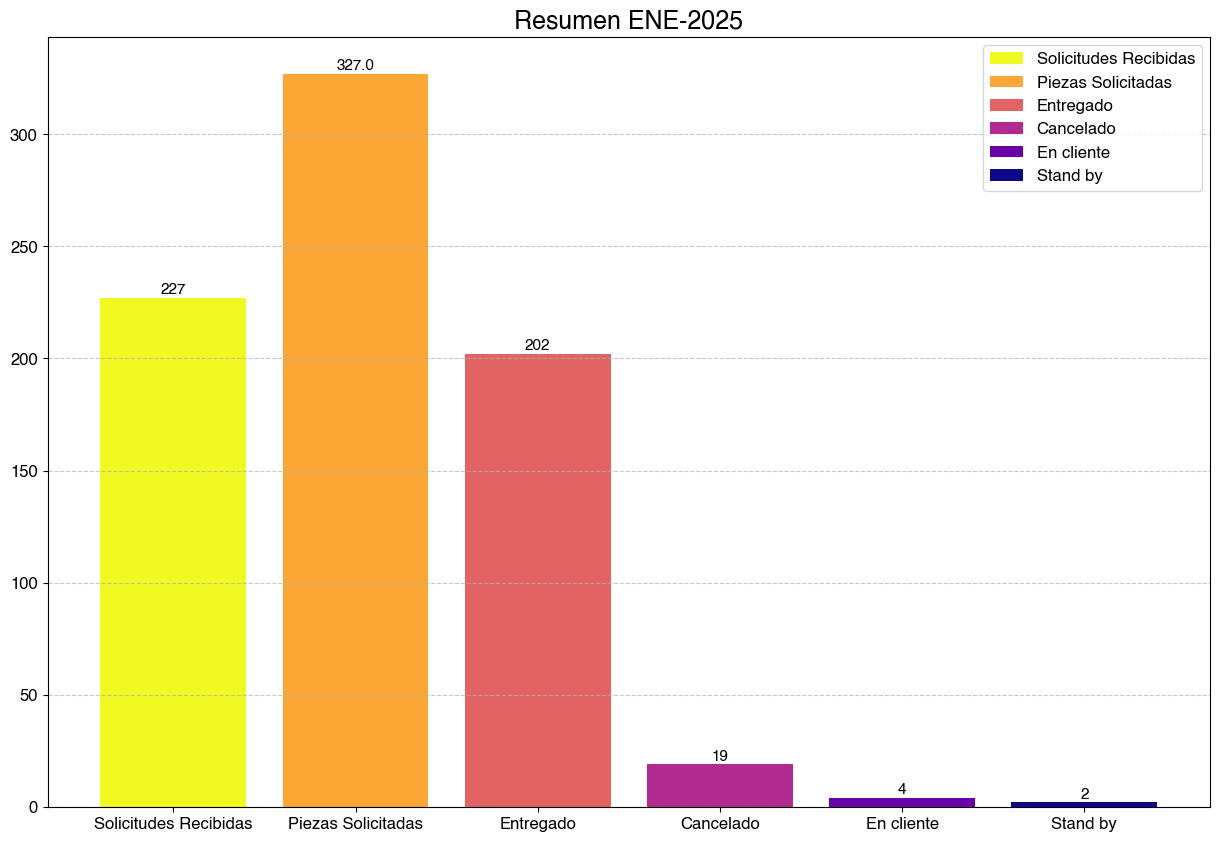

In [8]:
#Variables to hold data for bar chart 
categories = []
values = []

#Appending Solicitudes Recibidas
categories.append("Solicitudes Recibidas")
values.append(SOLICITUDES_RECIBIDAS)

#Appending Piezas Solicitadas
categories.append("Piezas Solicitadas")
values.append(PIEZAS_SOLICITADAS)

#Appending Piezas por estado to categories
[categories.append(item) for item in PIEZAS_POR_ESTADO.index]

#Appending Values por estado to 
[values.append(item) for item in PIEZAS_POR_ESTADO.values]

#Selecting colors for bars
colors = cm.plasma(np.linspace(1, 0, len(values)))  # from light to dark

#global change for font type in the chart
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'

#Setting the size of the figure
plt.figure(figsize=(15, 10))

#Creating bar chart for Month Summary
plt.bar(categories, values, label=categories, color = colors)

#Placing total values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=11)

#Figure title
plt.title("Resumen ENE-2025",
         fontsize = 18,
         fontweight = "bold",
         fontname = "Helvetica")

#Creating grid on the chart background
plt.grid(axis='y', linestyle='--', alpha=0.7) 

#Showing legend
plt.legend()

#Showing graph
plt.show()

## Bar chart: Piezas Solicitadas v. Piezas Entregadas

In [17]:
data = {
    "Mes": ["Enero"],
    "Piezas Solicitadas": [PIEZAS_SOLICITADAS],
    "Entregado": [PIEZAS_POR_ESTADO["Entregado"]]
}

df_agegado_solicitadas_entregadas = pd.DataFrame(data)
df_agegado_solicitadas_entregadas.to_csv("2025_Agregado_solicitadas_v_entregadas.csv")

In [ ]:
# solicitudes_recibidas_por_dia = data["Fecha de Solicitud"].value_counts()
# print(solicitudes_recibidas_por_dia)

# solicitudes_recibidas_por_semana = data.groupby("Semana")["Fecha de Solicitud"].value_counts()
# print(solicitudes_recibidas_por_semana)

# estado = data["Estado"].value_counts()
# estado
# total_de_piezas = data["Piezas"].sum()
